In [252]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [253]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [254]:
df = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-latest.csv')
df.data_somministrazione = pd.to_datetime(df.data_somministrazione)

In [255]:
df.sort_values('data_somministrazione', inplace=True)

In [256]:
df.head()

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,categoria_operatori_sanitari_sociosanitari,categoria_personale_non_sanitario,categoria_ospiti_rsa,categoria_over80,categoria_forze_armate,categoria_personale_scolastico,prima_dose,seconda_dose,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,0,1,0,0,0,0,0,1,0,ITF,ITF1,13,Abruzzo
94,2020-12-27,Pfizer/BioNTech,PIE,70-79,9,10,1,0,18,0,0,0,19,0,ITC,ITC1,1,Piemonte
95,2020-12-27,Pfizer/BioNTech,PIE,80-89,5,19,0,0,24,0,0,0,24,0,ITC,ITC1,1,Piemonte
96,2020-12-27,Pfizer/BioNTech,PIE,90+,5,15,0,0,20,0,0,0,20,0,ITC,ITC1,1,Piemonte
97,2020-12-27,Pfizer/BioNTech,PUG,20-29,18,33,47,4,0,0,0,0,51,0,ITF,ITF4,16,Puglia


In [257]:
df = df[df['data_somministrazione']>='2021-01-01']

In [258]:
#df.data_somministrazione = df.data_somministrazione.dt.strftime("%d-%m-%Y")

In [259]:
df['giorno_campagna'] = df.data_somministrazione.dt.dayofyear

In [260]:
df_pivot = (df.groupby(['data_somministrazione','fascia_anagrafica'])['prima_dose','seconda_dose'].sum().reset_index(level=0).
 pivot(columns='data_somministrazione', values='prima_dose').fillna(0))
df_pivot

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



data_somministrazione,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,...,2021-02-23,2021-02-24,2021-02-25,2021-02-26,2021-02-27,2021-02-28,2021-03-01,2021-03-02,2021-03-03,2021-03-04
fascia_anagrafica,,,,,,,,,,,,,,,,,,,,,
16-19,2.0,19.0,0.0,12.0,22.0,38.0,31.0,43.0,77.0,144.0,...,80.0,86.0,85.0,106.0,76.0,35.0,67.0,68.0,89.0,36.0
20-29,924.0,3513.0,3466.0,5930.0,6801.0,6580.0,7693.0,9015.0,8884.0,7460.0,...,5326.0,4964.0,4661.0,4944.0,4083.0,2614.0,4104.0,4807.0,4662.0,3315.0
30-39,1967.0,6934.0,6131.0,12099.0,13668.0,11285.0,15090.0,15401.0,13543.0,9938.0,...,7951.0,7939.0,7549.0,8728.0,8022.0,4516.0,6843.0,8725.0,8621.0,5578.0
40-49,2441.0,8464.0,7780.0,14575.0,16660.0,12858.0,19017.0,19571.0,16446.0,11470.0,...,13006.0,12843.0,12409.0,13992.0,14153.0,7676.0,12433.0,14722.0,14631.0,9365.0
50-59,3216.0,10834.0,10100.0,19950.0,22956.0,17826.0,26405.0,26857.0,22495.0,15278.0,...,12915.0,13468.0,14840.0,18687.0,19362.0,11067.0,17198.0,22238.0,21928.0,14315.0
60-69,1698.0,6577.0,5976.0,11971.0,14135.0,11874.0,15511.0,16060.0,16962.0,10685.0,...,3489.0,4794.0,6546.0,8489.0,9405.0,7051.0,8487.0,12746.0,13319.0,8138.0
70-79,184.0,597.0,533.0,1112.0,1568.0,1698.0,2308.0,2665.0,3045.0,2223.0,...,1769.0,1795.0,1530.0,1513.0,1500.0,835.0,1506.0,1525.0,2889.0,2491.0
80-89,281.0,802.0,597.0,1440.0,1858.0,1534.0,3063.0,3064.0,2929.0,1740.0,...,44259.0,49959.0,52660.0,50169.0,45518.0,28535.0,45823.0,47344.0,50286.0,36125.0
90+,325.0,750.0,532.0,1328.0,1802.0,1424.0,2780.0,2696.0,2433.0,1373.0,...,10585.0,14772.0,12503.0,10835.0,9950.0,6344.0,8969.0,10189.0,15555.0,11301.0


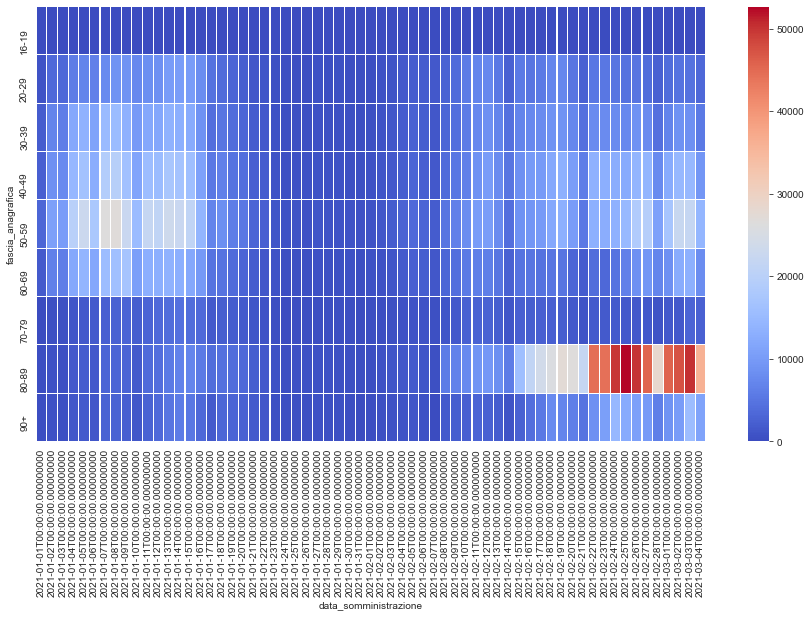

In [261]:

plt.figure(figsize=(15,8))
sns.heatmap(df_pivot, cmap='coolwarm', linecolor='white', linewidths=0.1)

In [262]:
daily = df.groupby('data_somministrazione')['prima_dose'].sum().reset_index()
df = df.merge(daily, left_on='data_somministrazione', right_on='data_somministrazione', how='inner', 
        suffixes=['','_totale_giorno'])

I need to groupby before calculating percentage as they are labelled by region as well

In [263]:
df1 = df.groupby(['data_somministrazione', 'fascia_anagrafica'])['prima_dose'].sum().reset_index(level=1).fillna(0)

In [264]:
df1 = df1.merge(daily, left_on='data_somministrazione', right_on='data_somministrazione', how='inner', 
        suffixes=['','_totale_giorno']).fillna(0)

In [265]:
df1['perc_tot_somministrati'] = (df1.prima_dose/df1.prima_dose_totale_giorno).mul(100).round(0)

In [266]:
#df1.data_somministrazione = df1.data_somministrazione.dt.strftime("%d-%m-%Y")
df1_pivot = df1.pivot(columns='data_somministrazione',index='fascia_anagrafica',values='perc_tot_somministrati').sort_index(ascending=False)

In [267]:
df_pivot

data_somministrazione,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,...,2021-02-23,2021-02-24,2021-02-25,2021-02-26,2021-02-27,2021-02-28,2021-03-01,2021-03-02,2021-03-03,2021-03-04
fascia_anagrafica,,,,,,,,,,,,,,,,,,,,,
16-19,2.0,19.0,0.0,12.0,22.0,38.0,31.0,43.0,77.0,144.0,...,80.0,86.0,85.0,106.0,76.0,35.0,67.0,68.0,89.0,36.0
20-29,924.0,3513.0,3466.0,5930.0,6801.0,6580.0,7693.0,9015.0,8884.0,7460.0,...,5326.0,4964.0,4661.0,4944.0,4083.0,2614.0,4104.0,4807.0,4662.0,3315.0
30-39,1967.0,6934.0,6131.0,12099.0,13668.0,11285.0,15090.0,15401.0,13543.0,9938.0,...,7951.0,7939.0,7549.0,8728.0,8022.0,4516.0,6843.0,8725.0,8621.0,5578.0
40-49,2441.0,8464.0,7780.0,14575.0,16660.0,12858.0,19017.0,19571.0,16446.0,11470.0,...,13006.0,12843.0,12409.0,13992.0,14153.0,7676.0,12433.0,14722.0,14631.0,9365.0
50-59,3216.0,10834.0,10100.0,19950.0,22956.0,17826.0,26405.0,26857.0,22495.0,15278.0,...,12915.0,13468.0,14840.0,18687.0,19362.0,11067.0,17198.0,22238.0,21928.0,14315.0
60-69,1698.0,6577.0,5976.0,11971.0,14135.0,11874.0,15511.0,16060.0,16962.0,10685.0,...,3489.0,4794.0,6546.0,8489.0,9405.0,7051.0,8487.0,12746.0,13319.0,8138.0
70-79,184.0,597.0,533.0,1112.0,1568.0,1698.0,2308.0,2665.0,3045.0,2223.0,...,1769.0,1795.0,1530.0,1513.0,1500.0,835.0,1506.0,1525.0,2889.0,2491.0
80-89,281.0,802.0,597.0,1440.0,1858.0,1534.0,3063.0,3064.0,2929.0,1740.0,...,44259.0,49959.0,52660.0,50169.0,45518.0,28535.0,45823.0,47344.0,50286.0,36125.0
90+,325.0,750.0,532.0,1328.0,1802.0,1424.0,2780.0,2696.0,2433.0,1373.0,...,10585.0,14772.0,12503.0,10835.0,9950.0,6344.0,8969.0,10189.0,15555.0,11301.0


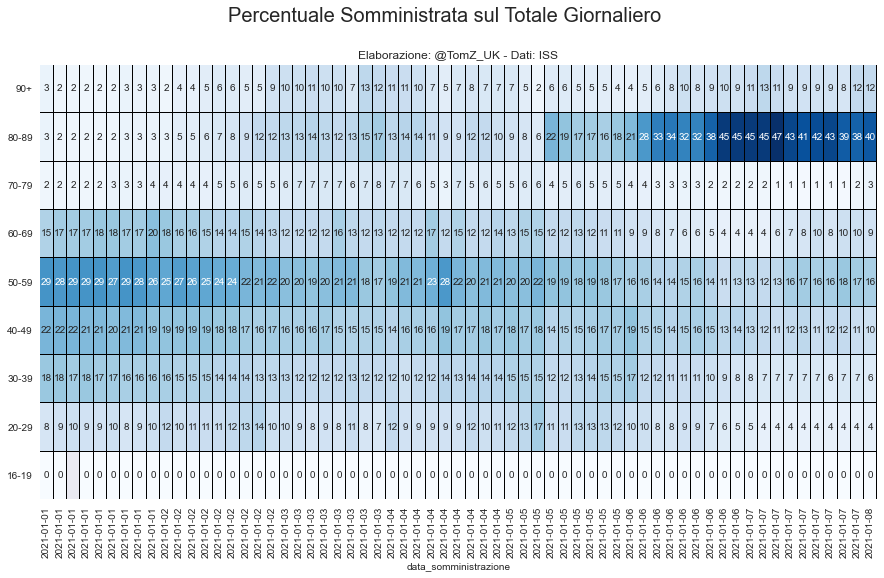

In [268]:
plt.figure(figsize=(15,8))
ax = sns.heatmap(df1_pivot, cmap='Blues'
,annot=True, linecolor='black', linewidths=0.01, cbar=False, fmt='g')
ax.set_xticklabels(df1.data_somministrazione.dt.date)
plt.ylabel('')
plt.yticks(rotation=0, )
plt.suptitle('Percentuale Somministrata sul Totale Giornaliero', fontsize=20)
plt.title('Elaborazione: @TomZ_UK - Dati: ISS')

plt.savefig('percentuale_totale_HM.png')

# Analisi Popolazione
Percentuale somministrazioni sul totale popolazione divisa per gruppi anagrafici

In [269]:
pd.read_html('https://www.tuttitalia.it/statistiche/popolazione-eta-sesso-stato-civile-2020/')[0]


Età Celibi/Nubili Coniugati/e   Vedovi/e Divorziati/e           Maschi  \
       Età Celibi/Nubili Coniugati/e   Vedovi/e Divorziati/e           Maschi   
0      0-4     2.264.538           0          0            0   1.163.19851,4%   
1      5-9     2.627.956           0          0            0   1.352.24051,5%   
2    10-14     2.835.060           0          0            0   1.460.44951,5%   
3    15-19     2.868.948       2.004         21           83   1.485.46551,7%   
4    20-24     2.890.840      64.253        127          668   1.549.02052,4%   
5    25-29     2.714.681     407.555        630        5.628   1.605.44451,3%   
6    30-34     2.084.313   1.169.221      2.418       26.489   1.658.74950,5%   
7    35-39     1.577.289   1.915.487      7.282       72.133   1.792.98150,2%   
8    40-44     1.393.337   2.620.552     18.957      154.618   2.089.19849,9%   
9    45-49     1.211.484   3.236.400     42.592      259.289   2.356.80049,6%   
10   50-54       914.381   3.545.692     84.717      331.914   2.404.14449,3%   
11   55-59       626.453   3.439.662    147.926      323.450   2.213.00848,8%   
12   60-64       411.731   3.006.985    230.387      244.247   1.874.92248,2%   
13   65-69       286.807   2.663.542    348.074      172.591   1.652.74047,6%   
14   70-74       225.584   2.429.874    544.701      124.201   1.555.30646,8%   
15   75-79       170.300   1.701.425    701.606       70.682   1.181.23344,7%   
16   80-84       140.403   1.162.123    888.727       40.283     930.78741,7%   
17   85-89        93.445     500.696    785.500       16.983     507.80936,4%   
18   90-94        46.534     129.439    434.772        5.615     179.13029,1%   
19   95-99        13.552      16.437    129.152        1.238      35.14121,9%   
20    100+         1.556         836     12.307          105       2.33215,8%   
21  Totale    25.399.192  28.012.183  4.379.896    1.850.217  29.050.09648,7%   

            Femmine             Totale          
            Femmine Unnamed: 7_level_1       %  
0    1.101.34048,6%          2.264.538    3,8%  
1    1.275.71648,5%          2.627.956    4,4%  
2    1.374.61148,5%          2.835.060    4,8%  
3    1.385.59148,3%          2.871.056    4,8%  
4    1.406.86847,6%          2.955.888    5,0%  
5    1.523.05048,7%          3.128.494    5,2%  
6    1.623.69249,5%          3.282.441    5,5%  
7    1.779.21049,8%          3.572.191    6,0%  
8    2.098.26650,1%          4.187.464    7,0%  
9    2.392.96550,4%          4.749.765    8,0%  
10   2.472.56050,7%          4.876.704    8,2%  
11   2.324.48351,2%          4.537.491    7,6%  
12   2.018.42851,8%          3.893.350    6,5%  
13   1.818.27452,4%          3.471.014    5,8%  
14   1.769.05453,2%          3.324.360    5,6%  
15   1.462.78055,3%          2.644.013    4,4%  
16   1.300.74958,3%          2.231.536    3,7%  
17     888.81563,6%          1.396.624    2,3%  
18     437.23070,9%            616.360    1,0%  
19     125.23878,1%            160.379    0,3%  
20      12.47284,2%             14.804    0,0%  
21  30.591.39251,3%         59.641.488  100,0%

In [270]:
pop = pd.read_html('https://it.wikipedia.org/wiki/Demografia_d%27Italia', thousands='.')[11]
pop = pop[['Età', 'Totale']]
pop.drop(index=101, axis=0, inplace=True)
pop.Totale = pd.to_numeric(pop.Totale)
pop.tail()

,Età,Totale
96,96 anni,30447
97,97 anni,22450
98,98 anni,15624
99,99 anni,10192
100,100 anni e più,15080


In [271]:
pop['Età'] = pd.to_numeric(pop['Età'].str.split(' ', expand=True)[0])

In [272]:
def ages(s):
    if (s['Età'] >= 0 and s['Età'] < 16):
        return '0-16'
    elif (s['Età'] >= 16 and s['Età'] <= 19):
        return '16-19'
    elif (s['Età'] >= 20 and s['Età'] <= 29):
        return '20-29'
    elif (s['Età'] >= 30 and s['Età'] <= 39):
        return '30-39'
    elif (s['Età'] >= 40 and s['Età'] <= 49):
        return '40-49'
    elif (s['Età'] >= 50 and s['Età'] <= 59):
        return '50-59'
    elif (s['Età'] >= 60 and s['Età'] <= 69):
        return '60-69'
    elif (s['Età'] >= 70 and s['Età'] <= 79):
        return '70-79'
    elif (s['Età'] >= 80 and s['Età'] <= 89):
        return '80-89'
    elif s['Età'] >= 90:
        return '90+'

def regrouping(s):
    if s['Età'] >= 0 | s['Età'] < 16:
        return '0-16'
    elif s['Età'] >= 16 | s['Età'] <= 19:
        return '16-19'
    elif s['Età'] >= 20 | s['Età'] <= 29:
        return '20-29'
    elif s['Età'] >= 30 | s['Età'] <= 39:
        return '30-39'
    elif s['Età'] >= 40 | s['Età'] <= 49:
        return '40-49'
    elif s['Età'] >= 50 | s['Età'] <= 59:
        return '50-59'
    elif s['Età'] >= 60 | s['Età'] <= 69:
        return '60-69'
    elif s['Età'] >= 70 | s['Età'] <= 79:
        return '70-79'
    elif s['Età'] >= 80 | s['Età'] <= 89:
        return '80-89'
    elif s['Età'] >= 90:
        return '90+'

In [273]:

pop['gruppo'] = pop.apply(ages, axis=1)

In [274]:
pop

,Età,Totale,gruppo
0,0,532991,0-16
1,1,542019,0-16
2,2,553729,0-16
3,3,561994,0-16
4,4,559203,0-16
...,...,...,...
96,96,30447,90+
97,97,22450,90+
98,98,15624,90+
99,99,10192,90+


In [275]:
pop = pop.groupby('gruppo')['Totale'].sum().reset_index()
pop.gruppo = pop.gruppo.astype(str)

In [276]:
pop

,gruppo,Totale
0,0-16,8885150
1,16-19,2310358
2,20-29,6327883
3,30-39,8345554
4,40-49,9567872
5,50-59,7871829
6,60-69,6860158
7,70-79,5628974
8,80-89,3117811
9,90+,518155


In [277]:
df1 = df1.merge(pop, left_on='fascia_anagrafica', right_on='gruppo', how='inner')
df1.drop('gruppo', axis=1, inplace=True)
df1.rename(columns={'Totale':'totale_fascia'}, inplace=True)
df1.head()

,data_somministrazione,fascia_anagrafica,prima_dose,prima_dose_totale_giorno,perc_tot_somministrati,totale_fascia
0,2021-01-01,16-19,2,11038,0.0,2310358
1,2021-01-02,16-19,19,38490,0.0,2310358
2,2021-01-04,16-19,12,68417,0.0,2310358
3,2021-01-05,16-19,22,79470,0.0,2310358
4,2021-01-06,16-19,38,65117,0.0,2310358


In [278]:
df2 = (df1.groupby(['data_somministrazione','fascia_anagrafica'])['prima_dose']
 .sum().groupby(level=0).cumsum().reset_index()
.merge(pop, left_on='fascia_anagrafica', right_on='gruppo')).drop(['gruppo'], axis=1)
df2.tail()

,data_somministrazione,fascia_anagrafica,prima_dose,Totale
561,2021-02-28,90+,68673,518155
562,2021-03-01,90+,105430,518155
563,2021-03-02,90+,122364,518155
564,2021-03-03,90+,131980,518155
565,2021-03-04,90+,90664,518155


In [279]:
df_last = df1.groupby('fascia_anagrafica')[['prima_dose','totale_fascia']].agg({'prima_dose':'sum','totale_fascia':'last'}).reset_index()

In [280]:
df_last['perc_vaccinata'] = (df_last.prima_dose/df_last.totale_fascia).mul(100).round(2)

In [281]:
df_last

,fascia_anagrafica,prima_dose,totale_fascia,perc_vaccinata
0,16-19,3230,2310358,0.14
1,20-29,266951,6327883,4.22
2,30-39,387082,8345554,4.64
3,40-49,521575,9567872,5.45
4,50-59,655248,7871829,8.32
5,60-69,370401,6860158,5.40
6,70-79,101919,5628974,1.81
7,80-89,793049,3117811,25.44
8,90+,235862,518155,45.52


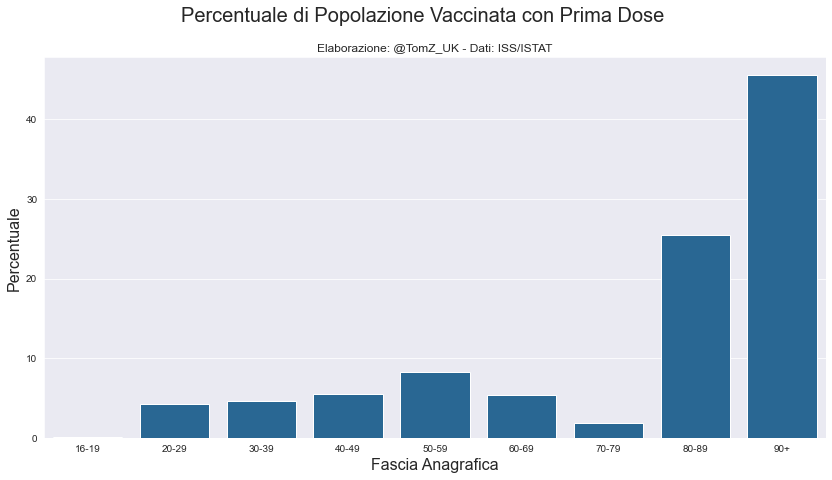

In [282]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,7))
sns.barplot(data=df_last, x='fascia_anagrafica',y='perc_vaccinata', color='#176AA5').set_title('Elaborazione: @TomZ_UK - Dati: ISS/ISTAT', fontsize=12)
plt.ylabel('Percentuale', fontsize=16)
plt.xlabel('Fascia Anagrafica', fontsize=16)
plt.suptitle('Percentuale di Popolazione Vaccinata con Prima Dose', fontsize=20)

plt.savefig('Percentuale_Pop.png')

In [283]:
(df.prima_dose.sum() + df.seconda_dose.sum())

4870398

In [284]:
pop.drop(index=0, inplace=True)

In [285]:
((df.prima_dose.sum()/pop.Totale.sum())*100).round(2)

6.6

# Gauge Chart

In [286]:
df_seconda = df.groupby(df.data_somministrazione)[['seconda_dose']].sum().cumsum().reset_index()
df_seconda.seconda_dose.diff()

0         NaN
1         0.0
2         0.0
3         0.0
4         0.0
       ...   
58     8125.0
59    24165.0
60    29749.0
61    40213.0
62    36179.0
Name: seconda_dose, Length: 63, dtype: float64

df.groupby(['data_somministrazione'])['prima_dose'].sum() \
  .groupby(level=1).cumsum().reset_index()

In [287]:
df_prima = df.groupby('data_somministrazione')[['prima_dose']].sum().cumsum().reset_index()

In [288]:
pop.Totale.sum()

50548594

In [289]:
df_prima['pct_pop_prima_dose'] = (df_prima.prima_dose/pop.Totale.sum()).mul(100)

In [290]:
df_prima['daily_change'] = df_prima.pct_pop_prima_dose.diff()

In [291]:
df_prima['prima_dose_giorno'] = df_prima.prima_dose.diff().fillna(0)
df_prima

,data_somministrazione,prima_dose,pct_pop_prima_dose,daily_change,prima_dose_giorno
0,2021-01-01,11038,0.021836,NaN,0.0
1,2021-01-02,49528,0.097981,0.076145,38490.0
2,2021-01-03,84643,0.167449,0.069468,35115.0
3,2021-01-04,153060,0.302798,0.135349,68417.0
4,2021-01-05,232530,0.460013,0.157215,79470.0
...,...,...,...,...,...
58,2021-02-28,2884879,5.707140,0.135855,68673.0
59,2021-03-01,2990309,5.915712,0.208572,105430.0
60,2021-03-02,3112673,6.157784,0.242072,122364.0
61,2021-03-03,3244653,6.418879,0.261095,131980.0


In [292]:
fig = go.Figure(go.Indicator(
    mode = "gauge+number+delta",
    value = float(df_prima.pct_pop_prima_dose.tail(1).round(1)),
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Percentuale Popolazione 16+ Vaccinata con Prima Dose", 'font': {'size': 24}},
    delta = {'reference': float(df_prima.pct_pop_prima_dose.iloc[-7]), 'increasing': {'color': "Green"},
            'valueformat':'.02f'},
    gauge = {
        'axis': {'range': [None, 100], 'tickwidth': 1, 'tickcolor': "darkblue"},
        'bar': {'color': "#FFBF00"},
        'bgcolor': "white",
        'borderwidth': 2,
        'bordercolor': "gray",
        'steps': [
            {'range': [0, 80], 'color': '#85C1E9'},
            {'range': [40, 60], 'color': '#85C1E9'},
            {'range': [60, 80], 'color': '#85C1E9'}],
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': 80}}))

fig.update_layout(paper_bgcolor = "lavender", font = {'color': "darkblue", 'family': "Arial"})

fig

In [293]:
df_prima['seconda_dose_giorno'] = df_seconda.seconda_dose.diff().fillna(0)
df_prima

,data_somministrazione,prima_dose,pct_pop_prima_dose,daily_change,prima_dose_giorno,seconda_dose_giorno
0,2021-01-01,11038,0.021836,NaN,0.0,0.0
1,2021-01-02,49528,0.097981,0.076145,38490.0,0.0
2,2021-01-03,84643,0.167449,0.069468,35115.0,0.0
3,2021-01-04,153060,0.302798,0.135349,68417.0,0.0
4,2021-01-05,232530,0.460013,0.157215,79470.0,0.0
...,...,...,...,...,...,...
58,2021-02-28,2884879,5.707140,0.135855,68673.0,8125.0
59,2021-03-01,2990309,5.915712,0.208572,105430.0,24165.0
60,2021-03-02,3112673,6.157784,0.242072,122364.0,29749.0
61,2021-03-03,3244653,6.418879,0.261095,131980.0,40213.0


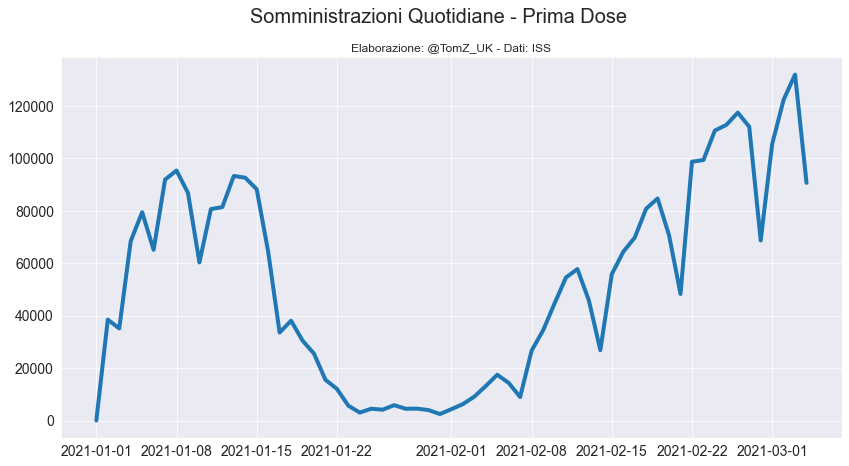

In [294]:
plt.figure(figsize=(14,7))
sns.lineplot(data=df_prima, x='data_somministrazione', y='prima_dose_giorno', 
             linewidth=4).set_title('Elaborazione: @TomZ_UK - Dati: ISS')
plt.suptitle('Somministrazioni Quotidiane - Prima Dose', fontsize=20)
plt.xlabel('')
plt.xticks(fontsize=14)
plt.ylabel('')
plt.yticks(fontsize=14)

plt.savefig('daily_first_doses.png')

In [295]:
df_pl = df_prima[['data_somministrazione','prima_dose_giorno','seconda_dose_giorno']]
df_pl.rename(columns={'prima_dose_giorno':'Prima Dose', 'seconda_dose_giorno':'Seconda Dose'}, inplace=True)
df_pl

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4446: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,data_somministrazione,Prima Dose,Seconda Dose
0,2021-01-01,0.0,0.0
1,2021-01-02,38490.0,0.0
2,2021-01-03,35115.0,0.0
3,2021-01-04,68417.0,0.0
4,2021-01-05,79470.0,0.0
...,...,...,...
58,2021-02-28,68673.0,8125.0
59,2021-03-01,105430.0,24165.0
60,2021-03-02,122364.0,29749.0
61,2021-03-03,131980.0,40213.0


In [296]:
df_pl = df_pl.melt(id_vars=['data_somministrazione'])


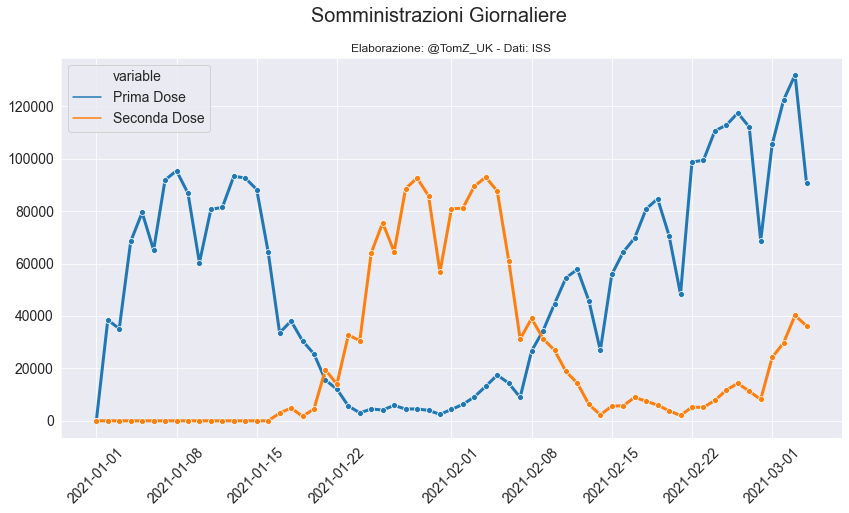

In [297]:

plt.figure(figsize=(14,7))
sns.lineplot(data=df_pl, x='data_somministrazione',y='value',hue='variable',
            linewidth=3, palette='tab10', marker='o').set_title('Elaborazione: @TomZ_UK - Dati: ISS')
plt.suptitle('Somministrazioni Giornaliere', fontsize=20)
plt.legend(fontsize=14)

plt.xlabel('')
plt.xticks(fontsize=14, rotation=45)
plt.ylabel('')
plt.yticks(fontsize=14)

plt.savefig('daily_doses.png')

# Regionale

In [298]:
df_reg = df.groupby('area')['prima_dose','seconda_dose'].sum()
df_reg

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,prima_dose,seconda_dose
area,,
ABR,71557,25488
BAS,33455,12910
CAL,75348,39804
CAM,305918,134361
EMR,282489,146577
FVG,83474,38891
LAZ,333789,139231
LIG,89365,40742
LOM,498963,261269


In [299]:
df_reg.rename(index={'ABR':'Abruzzo','BAS':'Basilicata','CAL':'Calabria',
                    'CAM':'Campania','EMR':'Emilia-Romagna','FVG':'Friuli Venezia Giulia',
                    'LAZ':'Lazio','LIG':'Liguria','LOM':'Lombardia','MAR':'Marche','MOL':'Molise',
                    'PIE':'Piemonte','PUG':'Puglia','SAR':'Sardegna','SIC':'Sicilia','TOS':'Toscana',
                    'UMB':'Umbria','VDA':"Valle d'Aosta",'VEN':'Veneto'}, inplace=True)

In [300]:
reg = pd.read_html('https://www.tuttitalia.it/regioni/popolazione/', thousands='.')[0]
reg = reg[['Regione', 'Popolazioneresidenti']]

In [301]:
df_reg.reset_index(inplace=True)
df_reg_m = df_reg.merge(reg, left_on='area',right_on='Regione', how='inner')
df_reg_m = df_reg_m[['area','prima_dose','seconda_dose','Popolazioneresidenti']]

In [302]:
df_reg_m['pct_prima_dose'] = (df_reg_m.prima_dose / df_reg_m.Popolazioneresidenti).mul(100).round(2)
df_reg_m['pct_seconda_dose'] = (df_reg_m.seconda_dose / df_reg_m.Popolazioneresidenti).mul(100).round(2)

In [303]:
df_reg_m.rename(columns={'pct_prima_dose':'Prima Dose pct', 'pct_seconda_dose':'Seconda Dose pct'}, inplace=True)

In [304]:
reg_melt = df_reg_m.melt(id_vars='area', value_vars=['Prima Dose pct','Seconda Dose pct'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text major ticklabel objects>)

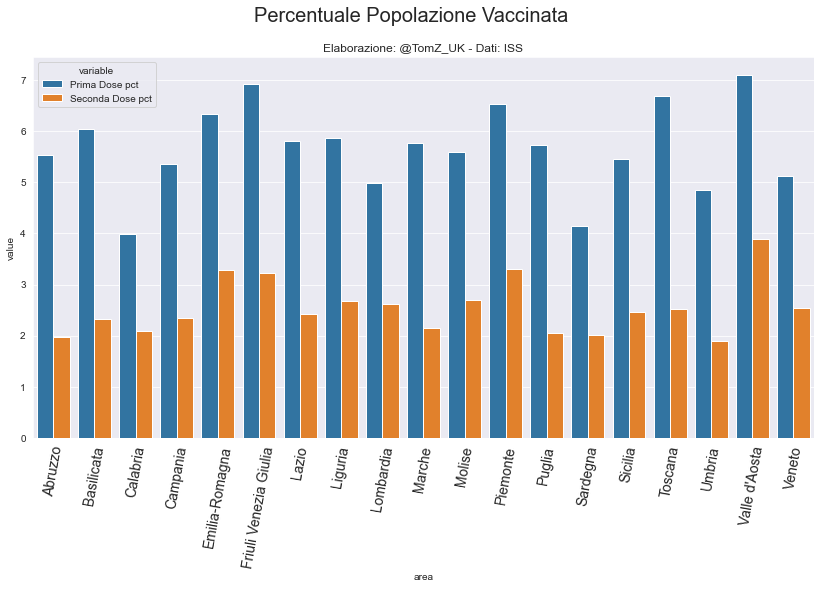

In [305]:
plt.figure(figsize=(14,7))

sns.barplot(data=reg_melt, x='area', y='value', hue='variable').set_title('Elaborazione: @TomZ_UK - Dati: ISS')
plt.suptitle('Percentuale Popolazione Vaccinata', fontsize=20)
plt.xticks(rotation=80, fontsize=14)

# Deliveries

In [306]:
deliveries = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/consegne-vaccini-latest.csv')
deliveries.head()

,area,fornitore,numero_dosi,data_consegna,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,Pfizer/BioNTech,135,2020-12-27,ITF,ITF1,13,Abruzzo
1,ABR,Pfizer/BioNTech,7800,2020-12-30,ITF,ITF1,13,Abruzzo
2,ABR,Pfizer/BioNTech,3900,2021-01-05,ITF,ITF1,13,Abruzzo
3,ABR,Pfizer/BioNTech,3900,2021-01-07,ITF,ITF1,13,Abruzzo
4,ABR,Pfizer/BioNTech,3900,2021-01-11,ITF,ITF1,13,Abruzzo


In [307]:
deliveries = deliveries.groupby(['data_consegna','nome_area','fornitore'])[['numero_dosi']].sum().reset_index()
deliveries.head()

,data_consegna,nome_area,fornitore,numero_dosi
0,2020-12-27,Abruzzo,Pfizer/BioNTech,135
1,2020-12-27,Basilicata,Pfizer/BioNTech,105
2,2020-12-27,Calabria,Pfizer/BioNTech,280
3,2020-12-27,Campania,Pfizer/BioNTech,720
4,2020-12-27,Emilia-Romagna,Pfizer/BioNTech,975


In [308]:
deliveries.nome_area.unique()

array(['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna',
       'Friuli-Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche',
       'Molise', 'Piemonte', 'Provincia Autonoma Bolzano / Bozen',
       'Provincia Autonoma Trento', 'Puglia', 'Sardegna', 'Sicilia',
       'Toscana', 'Umbria', "Valle d'Aosta / Vallée d'Aoste", 'Veneto'],
      dtype=object)

In [309]:
deliveries.replace({'Provincia Autonoma Trento':'PAT','Provincia Autonoma Bolzano / Bozen':'PAB',"Valle d'Aosta / Vallée d'Aoste":"Valle d'Aosta"},
                  
                 inplace=True)

In [310]:
df_reg['totale_somministrato'] = df_reg.prima_dose + df_reg.seconda_dose

In [311]:
deliveries.nome_area.unique()

array(['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna',
       'Friuli-Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche',
       'Molise', 'Piemonte', 'PAB', 'PAT', 'Puglia', 'Sardegna',
       'Sicilia', 'Toscana', 'Umbria', "Valle d'Aosta", 'Veneto'],
      dtype=object)

In [312]:
df_reg.merge(deliveries, left_on='area', right_on='nome_area')

,area,prima_dose,seconda_dose,totale_somministrato,data_consegna,nome_area,fornitore,numero_dosi
0,Abruzzo,71557,25488,97045,2020-12-27,Abruzzo,Pfizer/BioNTech,135
1,Abruzzo,71557,25488,97045,2020-12-30,Abruzzo,Pfizer/BioNTech,7800
2,Abruzzo,71557,25488,97045,2021-01-05,Abruzzo,Pfizer/BioNTech,3900
3,Abruzzo,71557,25488,97045,2021-01-07,Abruzzo,Pfizer/BioNTech,3900
4,Abruzzo,71557,25488,97045,2021-01-11,Abruzzo,Pfizer/BioNTech,3900
...,...,...,...,...,...,...,...,...
452,Veneto,249674,124351,374025,2021-02-18,Veneto,Pfizer/BioNTech,49140
453,Veneto,249674,124351,374025,2021-02-20,Veneto,AstraZeneca,41300
454,Veneto,249674,124351,374025,2021-02-23,Veneto,Pfizer/BioNTech,50310
455,Veneto,249674,124351,374025,2021-02-27,Veneto,AstraZeneca,37300


In [313]:
deliveries1 = deliveries.groupby('nome_area')[['numero_dosi']].sum().reset_index()

In [314]:
del_merged = df_reg.merge(deliveries1, left_on='area', right_on='nome_area')
del_merged.drop('nome_area', axis=1, inplace=True)
del_merged['pct_somministrato'] = (del_merged.totale_somministrato/del_merged.numero_dosi).mul(100).round(2)

In [328]:
del_merged.head()

,area,prima_dose,seconda_dose,totale_somministrato,numero_dosi,pct_somministrato
0,Abruzzo,71557,25488,97045,129950,74.68
1,Basilicata,33455,12910,46365,62275,74.45
2,Calabria,75348,39804,115152,193580,59.49
3,Campania,305918,134361,440279,534515,82.37
4,Emilia-Romagna,282489,146577,429066,559350,76.71


In [315]:
media = np.mean(del_merged.pct_somministrato)

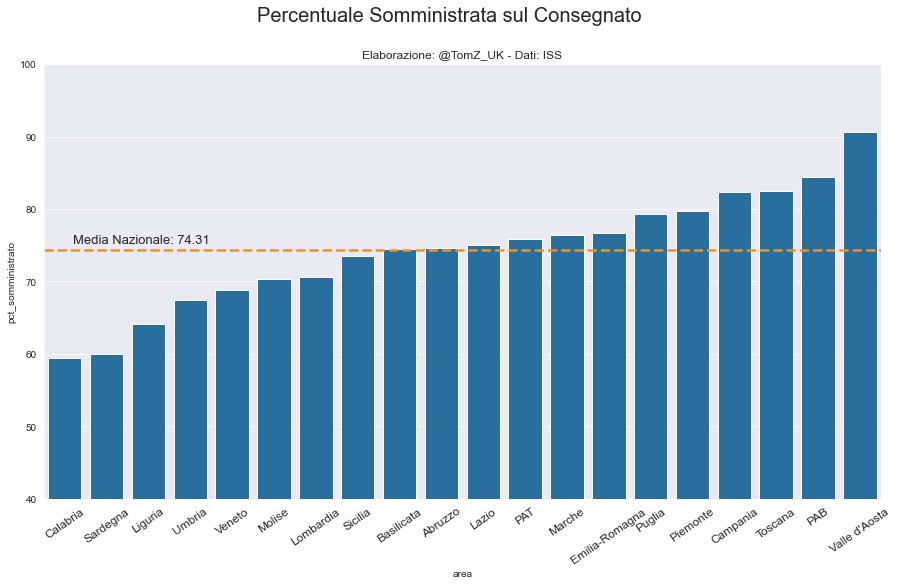

In [316]:
plt.figure(figsize=(15,8))
fig = sns.barplot(data=del_merged.sort_values('pct_somministrato'), x='area', y='pct_somministrato',
           color='#1573B2')
fig.axhline(media, ls='--', color='#E89429',
           lw=2.5)
fig.text(0.2,media+1,f'Media Nazionale: {media:.2f}',
        fontsize=13)
plt.suptitle('Percentuale Somministrata sul Consegnato', fontsize=20)
plt.title('Elaborazione: @TomZ_UK - Dati: ISS')
plt.xticks(rotation=35, fontsize=12)
plt.ylim(40,100)

plt.savefig('pct_somministrato_consegnato.png')

In [317]:
px.bar(del_merged,
      x='area',
      y='pct_somministrato',
      color='prima_dose')

# Suppliers

In [318]:
df.head()

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,categoria_operatori_sanitari_sociosanitari,categoria_personale_non_sanitario,categoria_ospiti_rsa,categoria_over80,categoria_forze_armate,categoria_personale_scolastico,prima_dose,seconda_dose,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area,giorno_campagna,prima_dose_totale_giorno
0,2021-01-01,Pfizer/BioNTech,SIC,60-69,90,42,115,17,0,0,0,0,132,0,ITG,ITG1,19,Sicilia,1,11038
1,2021-01-01,Pfizer/BioNTech,SAR,60-69,8,0,8,0,0,0,0,0,8,0,ITG,ITG2,20,Sardegna,1,11038
2,2021-01-01,Pfizer/BioNTech,SIC,50-59,100,91,168,23,0,0,0,0,191,0,ITG,ITG1,19,Sicilia,1,11038
3,2021-01-01,Pfizer/BioNTech,SIC,40-49,95,84,163,16,0,0,0,0,179,0,ITG,ITG1,19,Sicilia,1,11038
4,2021-01-01,Pfizer/BioNTech,SIC,30-39,81,85,153,13,0,0,0,0,166,0,ITG,ITG1,19,Sicilia,1,11038


In [329]:
df_fornitore = df.groupby(['fornitore', 'nome_area'])[['prima_dose','seconda_dose']].sum().reset_index()
df_fornitore['totale'] = (df_fornitore.prima_dose + df_fornitore.seconda_dose)


,fornitore,nome_area,prima_dose,seconda_dose
0,AstraZeneca,Abruzzo,13750,4
1,AstraZeneca,Calabria,4595,4
2,AstraZeneca,Campania,69840,0
3,AstraZeneca,Emilia-Romagna,14738,46
4,AstraZeneca,Friuli-Venezia Giulia,11345,0
...,...,...,...,...
57,Pfizer/BioNTech,Sicilia,203487,116955
58,Pfizer/BioNTech,Toscana,164798,89460
59,Pfizer/BioNTech,Umbria,34039,15539
60,Pfizer/BioNTech,Valle d'Aosta / Vallée d'Aoste,7065,4665


In [325]:
deliveries_fornitore = deliveries.groupby(['fornitore', 'nome_area'])['numero_dosi'].sum().reset_index()

,fornitore,nome_area,numero_dosi
0,AstraZeneca,Abruzzo,32400
1,AstraZeneca,Basilicata,13700
2,AstraZeneca,Calabria,47000
3,AstraZeneca,Campania,145500
4,AstraZeneca,Emilia-Romagna,108000
...,...,...,...
58,Pfizer/BioNTech,Sicilia,361825
59,Pfizer/BioNTech,Toscana,280640
60,Pfizer/BioNTech,Umbria,56635
61,Pfizer/BioNTech,Valle d'Aosta,10940


In [ ]:
df_fornitore.merge(deliveries_fornitore, left_on='nome_area',
                   right_on)